# Time Series - Draft

***

### Import packages

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import mpl_toolkits.basemap as bm
from netCDF4 import Dataset
from scipy import io
import os
import ecoliver as ecj
mpl.interactive(True)
import cmocean
from datetime import datetime

### Create variables

In [2]:
# File location
dataheader = '/home/oliver/data/sst/CoralTemp/'
path = '/home/mwang/results/'

# Load in coordinates
nc = Dataset(dataheader + '1985/coraltemp_v1.0_19850101.nc')
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
nc.close()

# Domain of interest
lon1 = -67.
lon2 = -51.
lat1 = 49.
lat2 = 63.

# lon1 = -51.
# lon2 = -50.
# lat1 = 59.
# lat2 = 60.

ii = (lon>=lon1) * (lon<=lon2)
jj = (lat>=lat1) * (lat<=lat2)
lon = lon[ii]
lat = lat[jj]
llon, llat = np.meshgrid(lon, lat)
X = len(lon)
Y = len(lat)
M = 12 # Number of months

# Time and dates
t, dates, T, year, month, day, doy = ecj.timevector([1985,1,1], [2019,12,31])

In [3]:
# Load data 
data = np.load(dataheader + 'CCI_Labrador.npz')  
sst = data['sst']
c = data['c']
t2 = data['t']

### Set up map

In [4]:
# Apply Lake Melville mask to CCI SST
i0 = 174
j1 = 80
j2 = 110
sst[j1:j2+1,:i0,:] = np.nan
c[j1:j2+1,:i0,:] = np.nan

# Plots

domain = [53.00, -63.00, 59.00, -55.50]
proj = bm.Basemap(projection='merc', llcrnrlat=domain[0], llcrnrlon=domain[1], urcrnrlat=domain[2], urcrnrlon=domain[3], resolution='h')

# Domain of data from above
# proj = bm.Basemap(projection='merc', llcrnrlat=lat1, llcrnrlon=lon1, urcrnrlat=lat2, urcrnrlon=lon2, resolution='h')

In [5]:
# fix variables to smaller domain

lon2 = lon[(lon<= domain[3]) & (lon >= domain[1])]
lat2 = lat[(lat<= domain[2]) & (lat >= domain[0])]
sst2 = sst[80:230, 80:200, :]
c = c[80:230, 80:200, :]

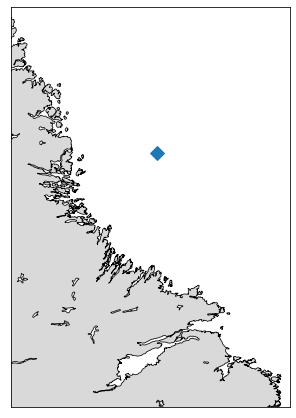

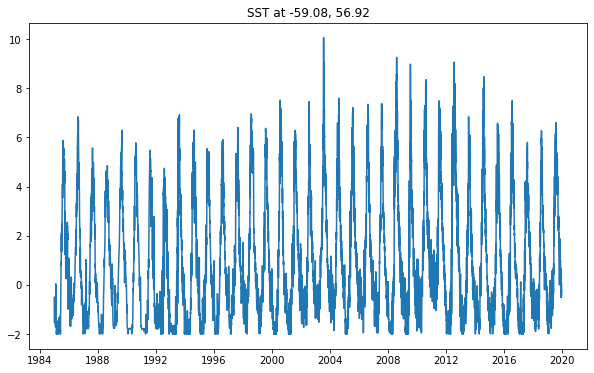

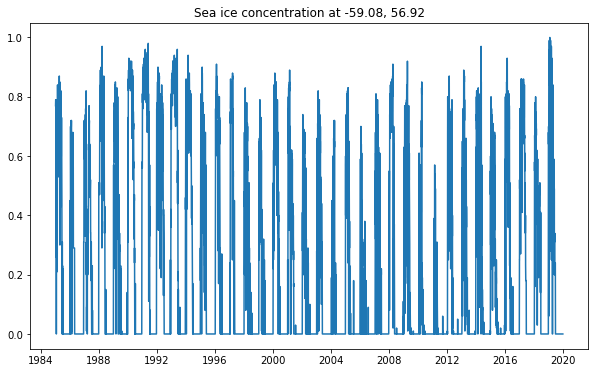

In [6]:
i = 78

# Plot location
plt.figure(figsize=(5,8))
# x, y = proj(lon2[i],lat2[i])
x, y = proj(lon2[i],lat2[i])

proj.fillcontinents(color='0.85', lake_color=None, ax=None, zorder=None, alpha=None)
proj.drawcoastlines(color='k', linewidth=0.75)
# plt.contourf(lonproj, latproj, sst[:,i,9-1], levels=sstlevels, cmap=cmocean.cm.thermal)
proj.plot(x, y, marker='D', markersize=10)


# Plot SST time series
plt.figure(figsize=(10,6))
plt.plot(dates, sst2[i,i,:])
plt.title('SST at {:.2f}, {:.2f}'.format(lon2[i], lat2[i]))
plt.show()

# Plot concentration time series
plt.figure(figsize=(10,6))
plt.plot(dates, c[i,i,:])
plt.title('Sea ice concentration at {:.2f}, {:.2f}'.format(lon2[i], lat2[i]))
plt.show()


### Add running mean

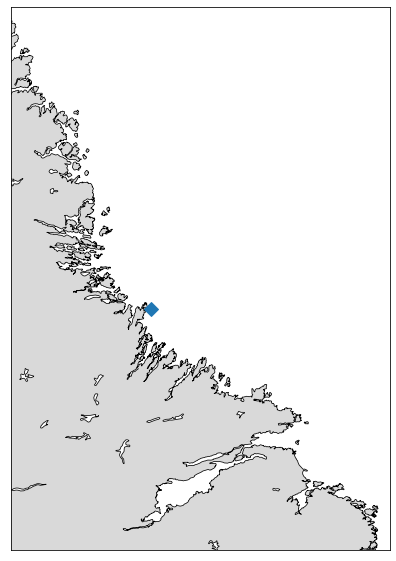

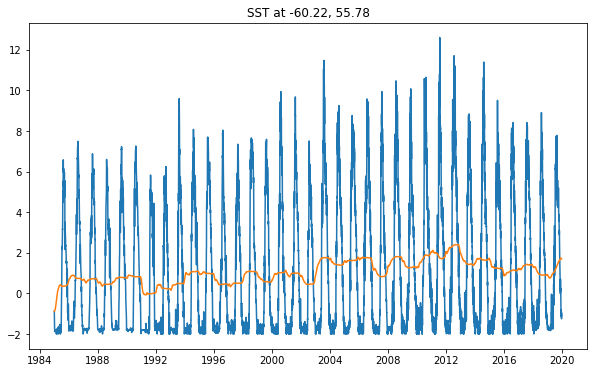

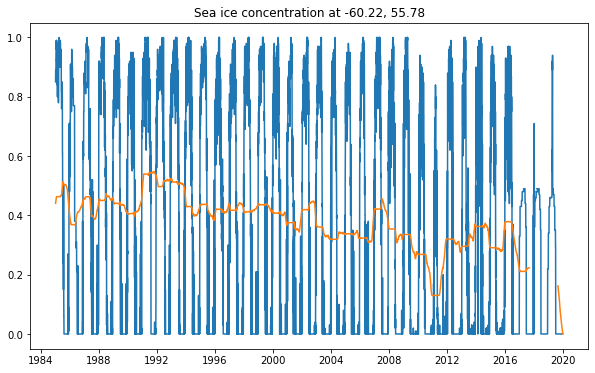

In [7]:
# Add running mean

i=55

# Plot location
plt.figure(figsize=(8,10))
# x, y = proj(lon2[i],lat2[i])
x, y = proj(lon2[i],lat2[i])

proj.fillcontinents(color='0.85', lake_color=None, ax=None, zorder=None, alpha=None)
proj.drawcoastlines(color='k', linewidth=0.75)
# plt.contourf(lonproj, latproj, sst[:,i,9-1], levels=sstlevels, cmap=cmocean.cm.thermal)
proj.plot(x, y, marker='D', markersize=10)

N = 365
cumsum_sst = np.convolve(sst2[i,i,:], np.ones((N,))/N, mode='same')
cumsum_c = np.convolve(c[i,i,:], np.ones((N,))/N, mode='same')

plt.figure(figsize=(10,6))
plt.plot(dates, sst2[i,i,:])
plt.plot(dates, cumsum_sst)
plt.title('SST at {:.2f}, {:.2f}'.format(lon2[i], lat2[i]))
plt.show()

plt.figure(figsize=(10,6))
plt.plot(dates, c[i,i,:])
plt.plot(dates, cumsum_c)
plt.title('Sea ice concentration at {:.2f}, {:.2f}'.format(lon2[i], lat2[i]))
plt.show()

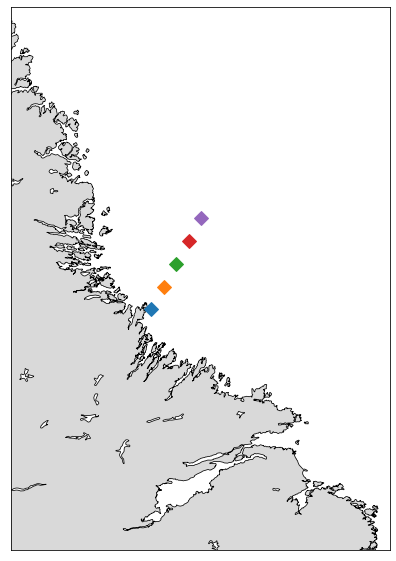

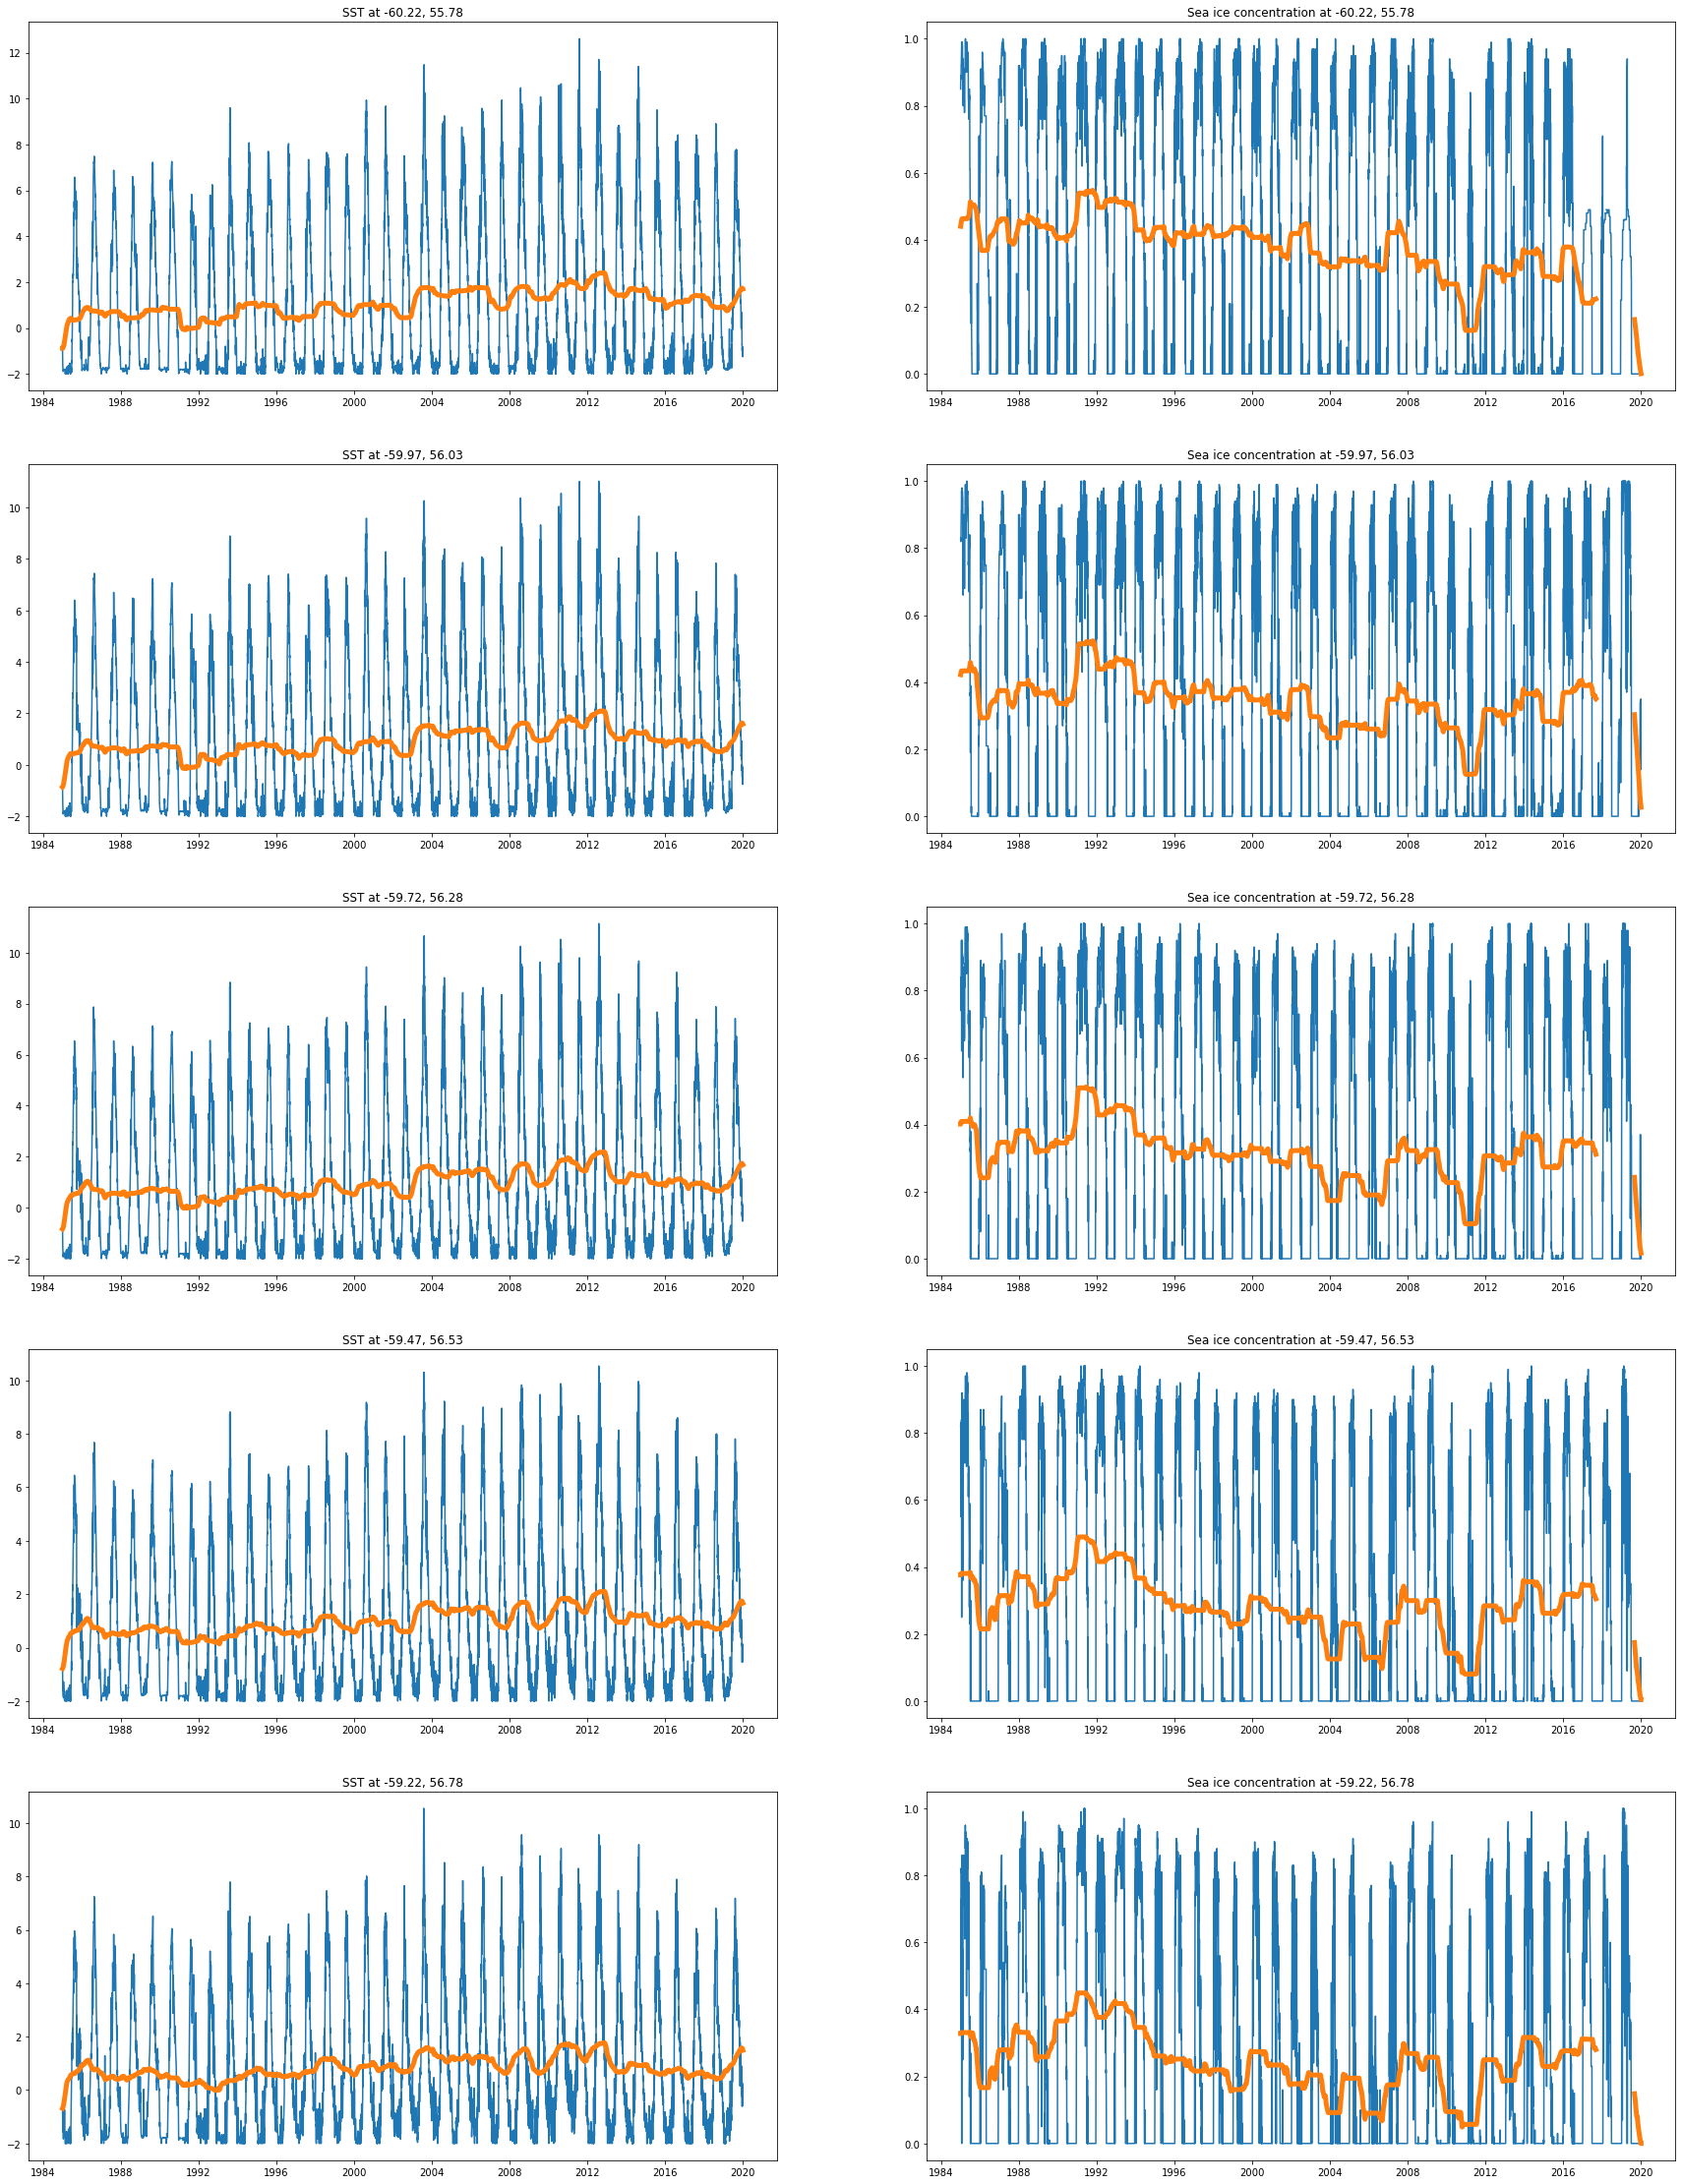

In [8]:
# Plot multiple means


plt.figure(num=1, figsize=(15,10))

proj.fillcontinents(color='0.85', lake_color=None, ax=None, zorder=None, alpha=None)
proj.drawcoastlines(color='k', linewidth=0.75)
# plt.contourf(lonproj, latproj, sst[:,i,9-1], levels=sstlevels, cmap=cmocean.cm.thermal)
# proj.plot(x, y, marker='D', markersize=10)

N = 365
locs = [55, 60, 65, 70, 75]
color = ['red', 'green', 'blue', 'cyan', 'magenta']

sp = 1
for i in locs:
    plt.figure(1)
    x, y = proj(lon2[i],lat2[i])
    x, y = proj(lon2[i],lat2[i])
    proj.plot(x, y, marker='D', markersize=10)
    
    
    plt.figure(num=2, figsize=(30,40))
    cumsum_sst = np.convolve(sst2[i,i,:], np.ones((N,))/N, mode='same')
    cumsum_c = np.convolve(c[i,i,:], np.ones((N,))/N, mode='same')

    plt.subplot(5,2,2*sp-1)
    plt.plot(dates, sst2[i,i,:])
    plt.plot(dates, cumsum_sst, linewidth=5)
    plt.title('SST at {:.2f}, {:.2f}'.format(lon2[i], lat2[i]))
    
#     plt.figure(figsize=(30,15))
#     plt.figure(2)
    plt.subplot(5,2,2*sp)
    plt.plot(dates, c[i,i,:])
    plt.plot(dates, cumsum_c, linewidth=5)
    plt.title('Sea ice concentration at {:.2f}, {:.2f}'.format(lon2[i], lat2[i]))
    sp +=1
plt.show()

## Averages trend for SST and Concentration

In [9]:
# Average sea ice concentration over space for all time

plt.figure(figsize=(10,10))
MM=[]
TT=[]

for i in range(0,len(dates)):
    mm = np.nanmean(c[:,:,i])
    MM.append(mm)
    tt = np.nanmean(sst2[:,:,i])
    TT.append(tt)

    

<ipython-input-9-d4efa864cfc1>:8: RuntimeWarning: Mean of empty slice
  mm = np.nanmean(c[:,:,i])


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Average SST')

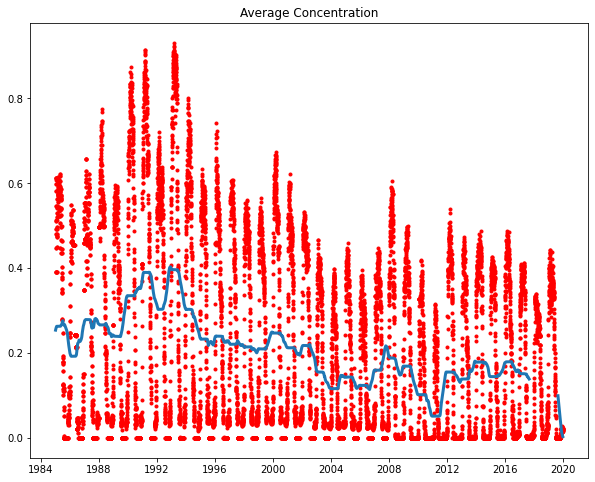

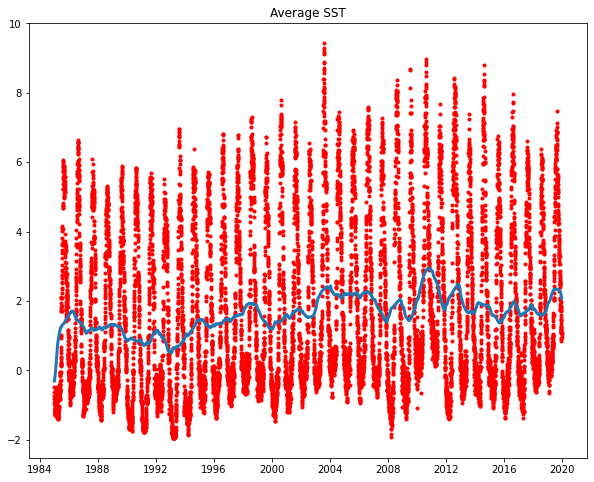

In [10]:
# Concentration
N=365 # in years
plt.figure(num=1, figsize=(10,8))
plt.plot(dates, MM, 'r.')
CS_MM = np.convolve(MM, np.ones((N,))/N, mode='same')  
plt.plot(dates, CS_MM, linewidth=3)
plt.title('Average Concentration')

# SST
plt.figure(num=2, figsize=(10,8))
plt.plot(dates, TT, 'r.')
CS_TT = np.convolve(TT, np.ones((N,))/N, mode='same')  
plt.plot(dates, CS_TT, linewidth=3)
plt.title('Average SST')

## Load T2M data - Change from Global

After, remove seasonal cycles to get anomolies

In [11]:
dataheader = '/home/oliver/data/ERA/ERA5/T2M/'
path = '/home/mwang/results/'

# Load in coordinates
nc = Dataset(dataheader + 'ERA5_T2M_1979.nc')
lon = nc.variables['longitude'][:]
lat = nc.variables['latitude'][:]
t = nc.variables['time'][:]
t2m = nc.variables['t2m'][0:100]

In [12]:
import xarray as xr

# Global 
# subset before loading

# ds=xr.open_mfdataset('/home/oliver/data/ERA/ERA5/T2M/*.nc', combine='by_coords')
ds=xr.open_mfdataset('/home/oliver/data/ERA/ERA5/T2M/ERA5_T2M_1979.nc')
# dataset = xr.open_dataset('/home/oliver/data/ERA/ERA5/T2M/ERA5_T2M_1979.nc')

In [13]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 8760)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-08 14:02:25 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [14]:
lon = ds.longitude
lat = ds.latitude
t = ds.time
t2m = ds.t2m

# Load Sea ice data